# Investigation on Titanic

The Titanic dataset was investigateed in this file. By exploring the dataset, we've found out that among all the passengers, the **cabinet class, sex and age** are effecting the survival rate. 

## Questions about the dataset
By looking at the dataset, the most important thing from this dataset is to find out which people survived, and what are the common features do the survived people share. 

According to the head of the table, there are several interesting parameters which might contribute to the survival:
- **1. Pclass**: Do higher class passengers have higher survival rate? 
- **2. Sex**: Do Ladies have higher survival rate? 
- **3. Age**: Do elder people have higher survival rate or lower?
- **4. Age, Sex**: Do elder ladies and young children have higher survival rate?


##  Load Data from CSVs
In order to explore which parameters contribute to the survival, let's first have a look at the data we got.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%pylab inline

/Users/xuemingli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/xuemingli/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
df = pd.read_csv("titanic_data.csv")
print df.describe(), "\n"
print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


##   (Question 1) Pclass : Do higher class passengers have higher survival rate? ##
Cabinet class is first studied here. A plot is shown for each class to visualize the survival data. 

Total passenger number:  891
6
Survival rate for Pclass 3:  0.242362525458
Survival rate for Pclass 2:  0.472826086957
Survival rate for Pclass 1:  0.62962962963


([<matplotlib.axis.XTick at 0x117a65c90>,
 <a list of 3 Text xticklabel objects>)

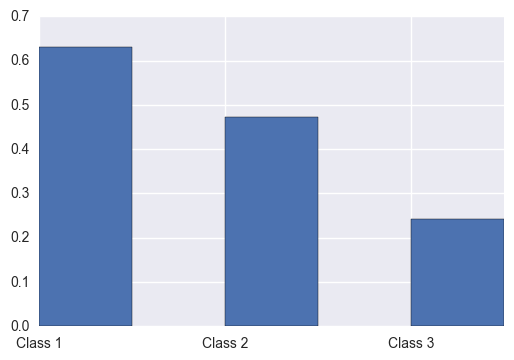

In [24]:
pclass = df.groupby(["Pclass", "Survived"] )
# print df.groupby(["Pclass","Survived"]).groups
print "Total passenger number: ", len(df)

print len(pclass["Pclass"])
three_n = len(pclass.groups[(3,0)])
three_sv = len(pclass.groups[(3,1)])
two_n = len(pclass.groups[(2,0)])
two_sv = len(pclass.groups[(2,1)])
one_n = len(pclass.groups[(1,0)])
one_sv = len(pclass.groups[(1,1)])

th_sv = three_sv/float(three_sv+ three_n)
t_sv = two_sv/float(two_sv+ two_n)
o_sv = one_sv/float(one_sv+ one_n)

print "Survival rate for Pclass 3: ", three_sv/float(three_sv+ three_n)
print "Survival rate for Pclass 2: ", two_sv/float(two_sv+ two_n)
print "Survival rate for Pclass 1: ", one_sv/float(one_sv+ one_n)

plt.bar([1,2,3], [ o_sv, t_sv, th_sv], width = 0.5)
plt.xticks([1,2,3], ["Class 1", "Class 2", "Class 3"])

**Pclass contributes to the survival rate.**

Among the three different classes, Pclass 1 has the highest survival rate of 63.0%, Pclass 2 has higher rate than Pclass 3. In this case we can conclude that Pclass is an important parameter.

## (Question 2) Sex: Do Ladies have higher survival rate?  ##



577
314
[577, 314]


([<matplotlib.patches.Wedge at 0x1191e1610>,
  <matplotlib.text.Text at 0x119077f10>])

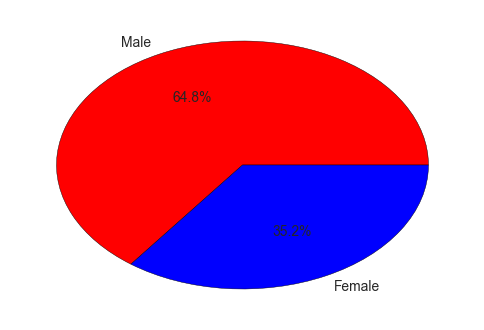

In [41]:
size = []
size.append(len(df[df["Sex"] == "male"]))
size.append(len(df[df["Sex"] == "female"]))
print len(df[df["Sex"] == "male"])
print len(df[df["Sex"] == "female"])
print size

labels = ['Male', 'Female']
colors = ['red', 'blue']

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')

The pie chart about the Sex groups shows that the male and female population are quite close.

Male survival: 
0    468
1    109
Name: Survived, dtype: int64


Female survival: 
1    233
0     81
Name: Survived, dtype: int64


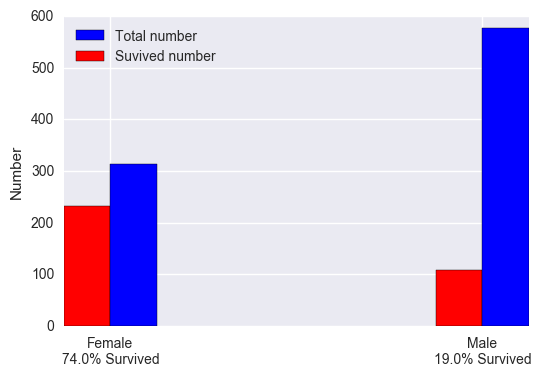

In [62]:
sx_m = df['Survived'][df['Sex']=='male'].value_counts()
sx_f = df['Survived'][df['Sex']=='female'].value_counts()

print "Male survival: \n", sx_m
print '\n'
print "Female survival: \n", sx_f

fm = 100*sx_f[1]/float(sx_f.sum())
mm = 100*sx_m[1]/float(sx_m.sum())
a = 'Female\n' + str(round(fm, 0)) + '% Survived'
b = 'Male\n' + str(round(mm, 0)) + '% Survived'
                   
plt.ylabel('Number')
plt.xticks((0.125,1.125),(a,b))
survived_num = plt.bar((0, 1), [sx_f[1],sx_m[1]], width = 0.125, color = 'red')
total_num = plt.bar((0.125,1.125),[sx_f.sum(),sx_m.sum()], width = 0.125, color = 'blue' )
plt.legend([total_num,survived_num],['Total number','Suvived number'],loc = 'upper left')

According to the survival rate simply grouped by **Sex**, female has much higher survival rate than Male. 

##  Clean the data ## 

However, by looking at the table it is found that there are 177 missing values for the Age, which shall not be ignored. Considering that "Adult" group is the major group among the "Age", so the missing values were valued as "Adult".

Thus here the provided ages can be grouped as **"Child", "Youth", "Adult" and "Elder"**

In [72]:
print "There are {} empty value for Age group.".format(df["Age"].isnull().sum())
print "Total population is: ", len(df)

There are 177 empty value for Age group.
Total population is:  891


In [73]:
def age_range(age):
    if age >=0 and age <12:
        return "Child"
    elif age < 18:
        return "Youth"
    elif age < 60:
        return "Adult"
    elif age > 60:
        return "Elder"
    else:
        return "Adult"

df["Age"] = df["Age"].apply(age_range)

##  (Question 3)  Age: Do elder people have higher survival rate or lower?  ##

Total amount: 
     Age  Survived
0  Adult       756
1  Child        68
2  Elder        22
3  Youth        45
Survived: 
     Age  Survived
0  Adult       276
1  Child        39
2  Elder         5
3  Youth        22
Survival rate: 
0    0.365079
1    0.573529
2    0.227273
3    0.488889
Name: Survived, dtype: float64


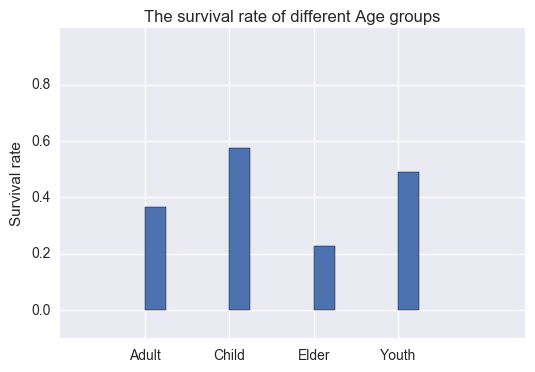

In [91]:
#Group the "Sex" and "Age" group
age = df.groupby(["Age"], as_index = False)

#Count the total amount of people in each group in "age_sum"
age_sum = age['Survived'].count()

#Count the survived people in each group in "age_sv"
age_sv = age.aggregate({'Survived': np.sum})

#Calculate the survival rate for each group
age_rate = age_sv["Survived"].div(age_sum["Survived"], axis='index') 

print "Total amount: \n", age_sum
print "Survived: \n",age_sv
print "Survival rate: "
print age_rate
#age_rate.plot(kind = "bar")

plt.xticks(range(4),["Adult", "Child", "Elder", "Youth"])
plt.xlim([-1,4.5])
plt.ylim([-0.1,1])
plt.ylabel('Survival rate')
plt.bar(range(4), age_rate, width = 0.25)
plt.title("The survival rate of different Age groups")

According to the survival rate simply grouped by **Age**, though the elder are lower than the others, but even NaN group has average survival rate. It's hard to get any conclusion from this chart simply by grouping them into Age groups. 

##  (Question 4) Sex, Age: Do Ladies and young children have higher survival rate?  ##

More parameters are studied. Another intuition is the **Gender** and **Age**. 

In [12]:
#Group the "Sex" and "Age" group
sxage = df.groupby(["Sex", "Age"], as_index = False)

#Count the total amount of people in each group in "sxage_sum"
sxage_sum = sxage['Survived'].count()

#Count the survived people in each group in "sxage_sv"
sxage_sv = sxage.aggregate({'Survived': np.sum})

print "Total amount: \n", sxage_sum
print "\n"
print "Survived: \n",sxage_sv

Total amount: 
      Sex    Age  Survived
0  female  Adult       256
1  female  Child        32
2  female  Elder         3
3  female  Youth        23
4    male  Adult       500
5    male  Child        36
6    male  Elder        19
7    male  Youth        22


Survived: 
      Sex    Age  Survived
0  female  Adult       192
1  female  Child        19
2  female  Elder         3
3  female  Youth        19
4    male  Adult        84
5    male  Child        20
6    male  Elder         2
7    male  Youth         3


In [13]:
#Calculate the survival rate for each group
sxage_rate = sxage_sv["Survived"].div(sxage_sum["Survived"], axis='index') 
print sxage_rate

0    0.750000
1    0.593750
2    1.000000
3    0.826087
4    0.168000
5    0.555556
6    0.105263
7    0.136364
Name: Survived, dtype: float64


4    0.168000
5    0.555556
6    0.105263
7    0.136364
Name: Survived, dtype: float64


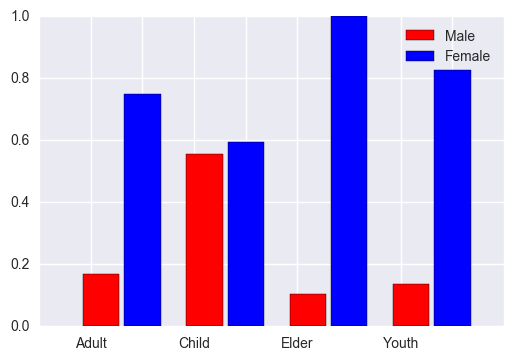

In [14]:
#Visuallize the survival rate for each group
#plt.bar(range(4), sxage_rate[4:8], width = 0.35, position=1)
#plt.bar(range(4), sxage_rate[0:4], width = 0.35, position=0)
print sxage_rate[4:8]

x = [1, 2,3,4]
xx = [0.6,1.6,2.6,3.6]
ax = plt.subplot(111)
ax.bar(xx,sxage_rate[4:8],width=0.35,color='r',align='center')

ax.bar(x,sxage_rate[0:4],width=0.35,color='b',align='center')
ax.set_xticklabels(("","Adult","","Child","", "Elder", "","Youth"))
ax.legend(('Male', 'Female'))


It is shown in this bar chart that **Female** has much generally higher survival rate than male. **Age** is also effecting the rate, among this **Femal Elder** (100%) and **Femal Youth** (82.6%) has the highest survival rate, while among the male list, **Male Child** (55.6%) has much higher survival rate than the others. 

However, due to that there're some people has age data missing **(NaN)**, we are not 100% sure that "Female Elder" all survived. So more parameters need to be explored.

## Conclusion ##
This chart shows the combination of "Pclass", "Sex" and "Age". 
1. Pclass has effect on the survival rate. 
    It is clearly shown that Pclass 3 has much lower survival rate, while the difference between Pclass 1 and 2 are not clear. 
2. Age and Sex both has effect on the survival rate. 
    Female has higher survival rate than male, and Female Elder has the highest among all. Male Adult and Elder has very low rate. However, Male Youth has high survival rate in Pclass 1 and 2 (both 100%), while 33% at Pclass 3. 
3. So far it is clear that there's correlation between Pclass, Sex and Age, but it's not causation relationship. Some Machine Learning calculation is required to oder to find out which parameter contributes more.  
